In [160]:
image_path = "/kaggle/input/signofletter/i1.PNG"
image = cv2.imread(image_path)
h, w, c = image.shape
# image = cv2.resize(image, (28, 28))
# analysisframe = image[0:500, 100:350]
# # Convert the image to grayscale
# # plt.imshow(image)
# analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
# plt.show(analysisframe)
# plt.title("Example Image")
# plt.show()
h,w,c

(659, 698, 3)

In [162]:
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

In [168]:
analysisframe = ''
framergbanalysis = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resultanalysis = hands.process(framergbanalysis)
hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
# print(hand_landmarksanalysis)
if hand_landmarksanalysis:
    print('Success')
    for handLMsanalysis in hand_landmarksanalysis:
        x_max = 0
        y_max = 0
        x_min = w
        y_min = h
        # creating the bounding box
        for lmanalysis in handLMsanalysis.landmark:
            x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)  # this is to scale back the coordinates into pixel form(initially it is been normalized in range(0,1))
            if x > x_max:
                x_max = x
            if x < x_min:
                x_min = x
            if y > y_max:
                y_max = y
            if y < y_min:
                y_min = y
        y_min -= 50
        y_max += 50
        x_min -= 50
        x_max += 50 

        analysisframe = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        analysisframe = analysisframe[y_min:y_max, x_min:x_max]
        analysisframe = cv2.resize(analysisframe,(28,28))

Success


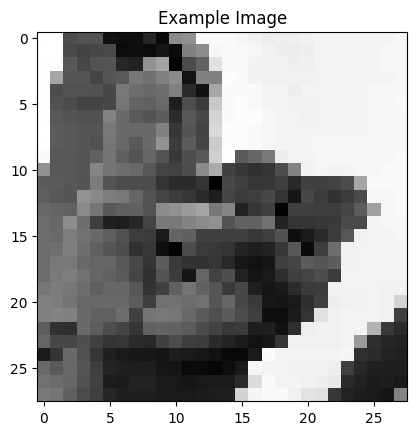

In [169]:
if analysisframe.size > 0:
    plt.imshow(analysisframe, cmap='gray')
    plt.title("Example Image")
    plt.show()

In [170]:
print(analysisframe.shape)
datan = analysisframe.flatten()
print(datan.shape)

(28, 28)
(784,)


In [171]:
datan = datan/255
# datan

In [40]:

# nlist = []
# rows,cols = analysisframe.shape
# for i in range(rows):
#     for j in range(cols):
#         k = analysisframe[i,j]
#         nlist.append(k)

# datan = pd.DataFrame(nlist).T
# colname = []
# for val in range(784):
#     colname.append(val)
# datan.columns = colname

# pixeldata = datan.values
# pixeldata = pixeldata / 255
# pixeldata = pixeldata.reshape(-1,28,28,1)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image_reshape = cv2.resize(image,(28,28))


In [41]:
# print(image_reshape.shape)
# print(datan.shape)

(28, 28)
(784,)


In [172]:
pixeldata = datan.reshape(-1,28,28,1)
print(pixeldata.shape)

(1, 28, 28, 1)


In [154]:
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Normalize the pixel values to the range [0, 1]
# image = image / 255.0

# # Reshape the image to match the model's input shape (28, 28, 1)
# image = np.expand_dims(image, axis=-1)
# image = np.expand_dims(image, axis=0) 